# Telco: Data Cleansing

### Load Library

In [33]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [34]:
pd.options.display.max_columns = 50 

#import dataset
df_load = pd.read_csv('Telco Data Cleansing.csv')

#Show number of rows and columns
print(df_load.shape)

#Show top 5 data
print(df_load.head(5))

#Number of unique IDs
print(df_load.customerID.nunique())

(7113, 23)
   Unnamed: 0  UpdatedAt   customerID  gender  SeniorCitizen Partner  \
0           0     202006  45759018157  Female              0     Yes   
1           1     202006  45557574145    Male              0      No   
2           2     202006  45366876421    Male              0      No   
3           3     202006  45779536532    Male              0      No   
4           4     202006  45923787906  Female              0      No   

  Dependents  tenure PhoneService     MultipleLines InternetService  \
0         No     1.0           No  No phone service             DSL   
1         No    34.0          Yes                No             DSL   
2         No     2.0          Yes                No             DSL   
3         No    45.0           No  No phone service             DSL   
4         No     2.0          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No         

### Filtering Certain Format Customer ID Numbers

Look for the correct __customerID__ (Phone Number) format, with the following criteria:

1. Character length is 11-12
2. Consists of numbers only
3. Starting with the number 45 the first 2 digits


In [35]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

print('The filtered result the number of Customer IDs is', df_load['customerID'].count())

The filtered result the number of Customer IDs is 7006


### Filtering Duplicate Customer ID Numbers

Ensure that there are no duplicate customer ID numbers. Usually this type of duplicate ID number:
1. Duplication due to inserting more than once with the same value in each column
2. Duplication due to inserting different data retrieval periods

In [36]:
# Drop Duplicate Rows
df_load.drop_duplicates()

# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('The result of the number of Customer IDs that have been removed from duplication (distinct) is',df_load['customerID'].count())

The result of the number of Customer IDs that have been removed from duplication (distinct) is 6993


### Resolving Missing Values by Deleting Rows


In [37]:
print('Total missing values data from the Churn column', df_load['Churn'].isnull().sum())

# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows and Data column after deleting Missing Values data is', df_load.shape)

Total missing values data from the Churn column 43
Total Rows and Data column after deleting Missing Values data is (6950, 23)


### Detecting Outliers (Boxplot)


Distribution of data before being handled by Outliers: 
            tenure  MonthlyCharges  TotalCharges
count  6851.000000     6924.000000   6935.000000
mean     32.787622       65.766219   2307.039265
std      25.236643       50.551720   2581.095419
min       0.000000        0.000000     19.000000
25%       9.000000       36.087500    404.975000
50%      30.000000       70.450000   1400.850000
75%      56.000000       89.900000   3807.675000
max     500.000000     2311.000000  80000.000000


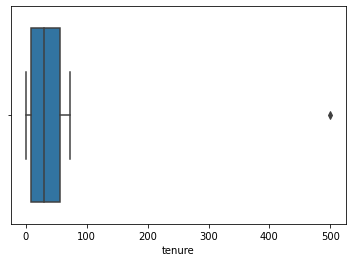

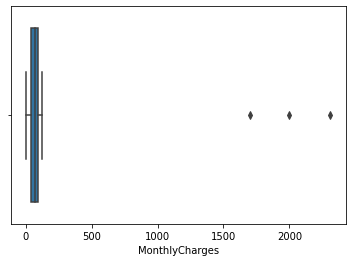

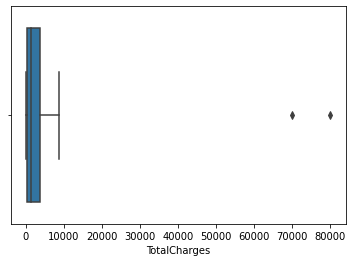

In [38]:
print('\nDistribution of data before being handled by Outliers: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

#Before

plt.figure() 
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() 
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() 
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

In [39]:
# Handling Outliers with IQR

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('The Maximum Value of each Variable is: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nThe Minimum Value of each Variable is: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nDistribution of data after being handled by Outliers: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

The Maximum Value of each Variable is: 
tenure             126.50000
MonthlyCharges     170.61875
TotalCharges      8911.72500
dtype: float64

The Minimum Value of each Variable is: 
tenure             -61.50000
MonthlyCharges     -44.63125
TotalCharges     -4699.07500
dtype: float64

Distribution of data after being handled by Outliers: 


C:\Users\Ahmad Gilang A\AppData\Local\Temp\ipykernel_5224\3235440132.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\Ahmad Gilang A\AppData\Local\Temp\ipykernel_5224\3235440132.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


            tenure  MonthlyCharges  TotalCharges
count  6851.000000     6924.000000   6935.000000
mean     32.733105       64.972004   2287.979921
std      24.623169       30.087558   2267.796359
min       0.000000        0.000000     19.000000
25%       9.000000       36.087500    404.975000
50%      30.000000       70.450000   1400.850000
75%      56.000000       89.900000   3807.675000
max     126.500000      170.618750   8911.725000


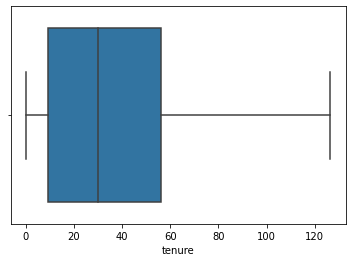

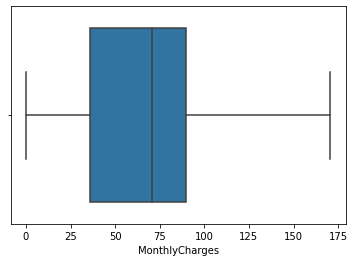

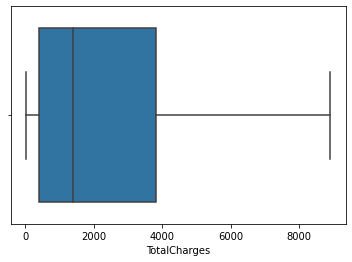

In [40]:
# After

plt.figure() 
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() 
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() 
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Detecting Non-Standard Values

In [41]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

### Standardizing Categorical Variables

In [42]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


### Conclusion

There is no __Missing Value__, __Outliers__, and __Non-Standard Values__ after preparation the data (data cleansing). 